In [126]:
import numpy as np
import matplotlib.pyplot as plt
import random

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

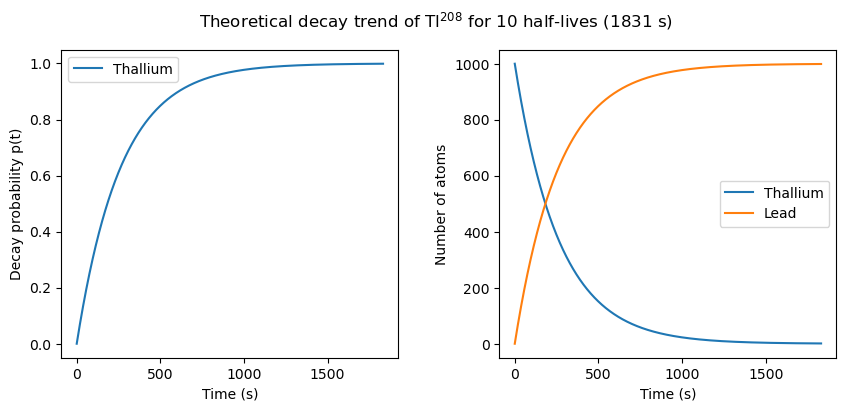

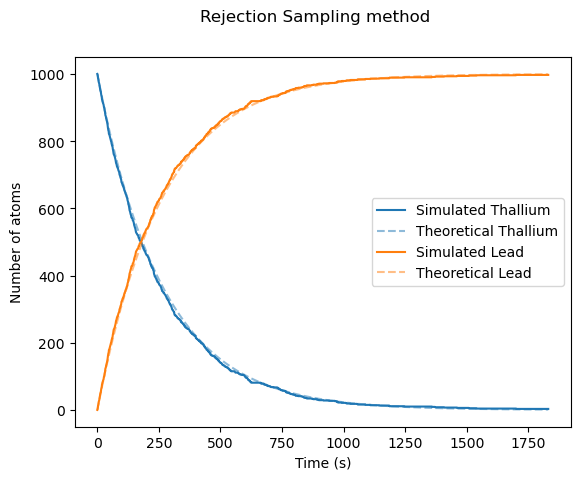

After 1 tau time (183 s) 50% of the atoms will have decayed, after 2 tau 75%, after 3 tau 87.5%, after 4 tau 93.75% and after 10 tau 99.9%.


In [127]:
# Ex. 1.

# decay probability over time
def decay_pdf(t,tau):
    return 1 - 2**(-t/tau)

tau = 3.052 * 60 # half-life of Tl atoms in seconds
t_max = 10*tau # time for 10 half-lives in seconds
num_atoms = 1000 # initial number of Tl atoms

# list of times in steps of 1 second for 10 half lives
time = np.linspace(0, round(t_max), round(t_max)+1, dtype=int)

# plot Tl decay probability
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
plt.subplots_adjust(wspace=0.3)                 
fig.suptitle(r'Theoretical decay trend of ${\rm Tl}^{208}$ for 10 half-lives (1831 s)')
ax[0].plot(time, decay_pdf(time, tau),label='Thallium')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Decay probability p(t)')
ax[0].legend(loc='best')
# plot Tl and Pb theoretical number of atoms over time
ax[1].plot(time, num_atoms * (1 - decay_pdf(time, tau)),label='Thallium')
ax[1].plot(time, num_atoms * decay_pdf(time,tau),label='Lead')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Number of atoms')
ax[1].legend(loc='best')
plt.show()

# initialize Tl and Pb atom counts
tl_count = []
pb_count = []
tl_count.append(num_atoms)
pb_count.append(0)
tl_temp = num_atoms
pb_temp = 0

# probability of decay for one time step
prob = decay_pdf(1, tau)

# simulate decay over time using Rejection Sampling method
for t in time[1:]:
    for i in range(0, tl_count[t-1]):
        if np.random.rand() < prob:
            tl_temp = tl_temp - 1
            pb_temp = pb_temp + 1
    tl_count.append(tl_temp)
    pb_count.append(pb_temp)

# plot Tl and Pb simulated and theoretical number of atoms over time
fig,ax = plt.subplots(1,1)
fig.suptitle(r'Rejection Sampling method')
ax.plot(time, tl_count, label='Simulated Thallium')
ax.plot(time, num_atoms * (1 - decay_pdf(time, tau)), 'C0--', alpha=0.5, label='Theoretical Thallium')
ax.plot(time, pb_count, label='Simulated Lead')
ax.plot(time, num_atoms * decay_pdf(time,tau), 'C1--', alpha=0.5, label='Theoretical Lead')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Number of atoms')
ax.legend()
plt.show()

print("After 1 tau time (183 s) 50% of the atoms will have decayed, after 2 tau 75%, after 3 tau 87.5%, after 4 tau 93.75% and after 10 tau 99.9%.")

In case of a probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$, the CDF is:

$$
    CDF(t) = \int_0^t p(t') dt' = \frac{\ln 2}{\tau} \int_0^t 2^{-t/\tau} dt' = 1-2^{-t/\tau} = y
$$

inverting and solving for $t$:

$$t = CDF^{-1}(y) = -\tau \log_2(1-y)$$

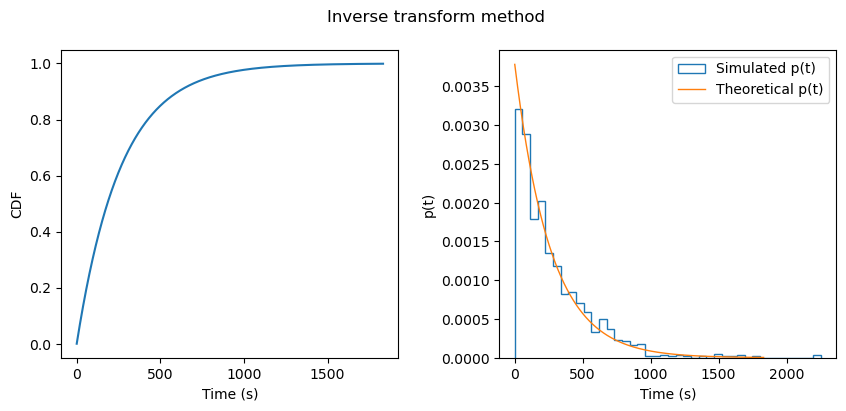

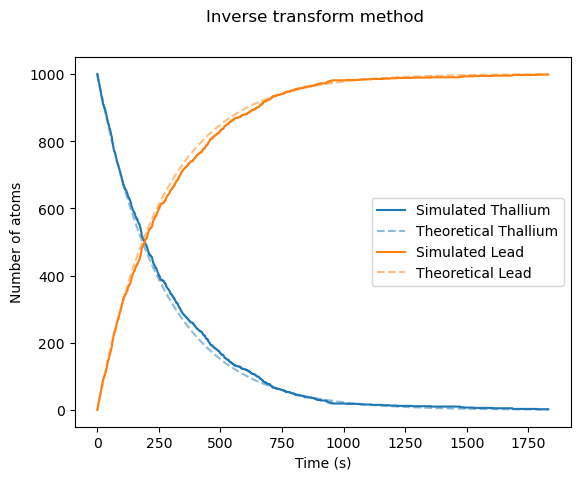

In [128]:
# probability distribution
def pdf(t, tau):
    return (np.log(2)/tau) * 2**(-t/tau)

# cumulative distribution function (CDF) 
def cdf(t, tau):
    return 1 - 2**(-t/tau)

# inverse CDF
def icdf(y, tau):
    return -tau*np.log2(1-y)

# uniform distribution random numbers between 0 and 1
y_rand = np.random.random(num_atoms)
# apply the inverse of the CDF to find the simulated distribution
time_rand = icdf(y_rand, tau)

# plot CDF
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
fig.suptitle(r'Inverse transform method')
plt.subplots_adjust(wspace=0.3)                 
ax[0].plot(time, cdf(time, tau))
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('CDF')
# plot simulated probability distribution and theoretical one
ax[1].hist(time_rand, histtype='step', bins=40, density=True, linewidth=1, label='Simulated p(t)')
ax[1].plot(time, pdf(time, tau), linewidth=1, label='Theoretical p(t)')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('p(t)')
ax[1].legend(loc='best')
plt.show()

# calculate number of atoms remaining at each time step

tl_count = []
pb_count = []

for t in time:
    tl_temp = 0
    for tr in time_rand:
        #if the simulated decay time is greater than the actual time then the atom has not decayed
        if tr>t:
            tl_temp = tl_temp + 1
    tl_count.append(tl_temp)
    pb_count.append(num_atoms-tl_temp)         

# plot Tl and Pb simulated and theoretical number of atoms over time
fig,ax = plt.subplots(1,1)
fig.suptitle(r'Inverse transform method')
ax.plot(time, tl_count, label='Simulated Thallium')
ax.plot(time, num_atoms * (1 - decay_pdf(time, tau)), 'C0--', alpha=0.5, label='Theoretical Thallium')
ax.plot(time, pb_count, label='Simulated Lead')
ax.plot(time, num_atoms * decay_pdf(time,tau), 'C1--', alpha=0.5, label='Theoretical Lead')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Number of atoms')
ax.legend()
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

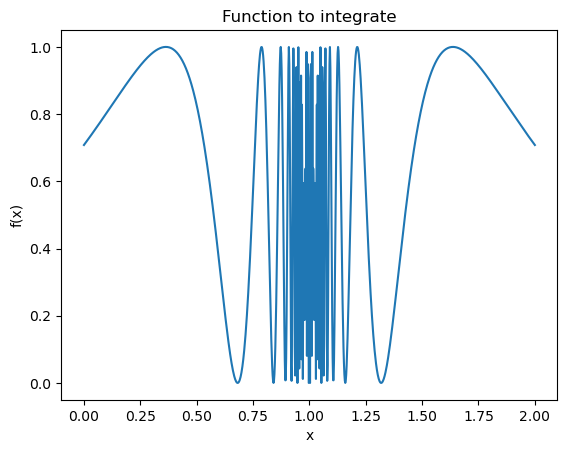

The expected integral value is: 1.3469.

The integral value with the hit and miss method is: 1.3471 +/- 0.0004.
The integral value with the mean value method is: 1.3468 +/- 0.0006.

The integrals are both obtained by repeating the integral 10 times and from the distribution of the integrals by taking the mean and standard deviation.
The integral value with the mean value method in one run with the associated error is: 1.3463 +/- 0.0007.

The two methods return slightly different values but compatible within the statistical error. The hit and miss method is a little less accurate, but both associated errors are less than 0.005% for N = 10^6.


In [132]:
# Ex. 2.

#definition of the function to integrate
def f(x):
    return (np.sin(1./(1-x)))**2

#plot of the function to integrate
x = np.linspace(0, 2, 1000)
plt.plot(x, f(x))
plt.title('Function to integrate')
plt.xlabel('x')
plt.ylabel('f(x)');
plt.show()

#number of random points to generate
N = 10**6
#integration domain
a = 0
b = 2

#function that performs the integral of a function with the hit and miss method
def integral_hm(f, a, b, N):
    count = 0  #counter
    for i in range(N):
        x = 2*np.random.random()  #x is random uniform between 0 and 2
        y = np.random.random()    #y is random uniform between 0 and 1
        if y<f(x): count += 1  
    I_hm = ((b-a)/N)*count  #integral value
    return I_hm
            
#function that performs the integral of a function with the mean value method
def integral_mv(f, a, b, N):
    f_list = []  #list of f(x)
    for i in range(N):
        x = 2*np.random.random()  #x is random uniform between 0 and 2
        y = np.random.random()    #y is random uniform between 0 and 1
        f_list.append(f(x))
    sum_f = np.sum(f_list)
    varf = np.var(f_list)
    I_mv = ((b-a)/N)*sum_f  #integral value
    sigma_mv = (b-a)*np.sqrt(varf/N)  #integral error
    return I_mv, sigma_mv

#repetition of the integral 10 times with hit and miss and mean value method
I_hm_repetition = []
I_mv_repetition = []
n = 10 #number of iterations of the integral calculation
for i in range(n):
    I_hm_repetition.append(integral_hm(f, 0., 2., N))
    I_mv, _ = integral_mv(f, 0., 2., N)
    I_mv_repetition.append(I_mv)
    
#calculation of the mean and the error of the mean
mean_I_hm = np.mean(I_hm_repetition)
sigma_hm = (b-a)*np.std(I_hm_repetition)/np.sqrt(n)
mean_I_mv = np.mean(I_mv_repetition)
sigma_mv = (b-a)*np.std(I_mv_repetition)/np.sqrt(n)

print('The expected integral value is: 1.3469.')

print('\nThe integral value with the hit and miss method is: %.4f +/- %.4f.' % (mean_I_hm, sigma_hm))
print('The integral value with the mean value method is: %.4f +/- %.4f.' % (mean_I_mv, sigma_mv))

print('\nThe integrals are both obtained by repeating the integral 10 times and from the distribution of the integrals by taking the mean and standard deviation.')

#calculation of the integral value and error with the mean value method in one run
I_mv, sigma_mv = integral_mv(f, 0., 2., N)

print('The integral value with the mean value method in one run with the associated error is: %.4f +/- %.4f.' % (I_mv, sigma_mv))

print('\nThe two methods return slightly different values but compatible within the statistical error. The hit and miss method is a little less accurate, but both associated errors are less than 0.005% for N = 10^6.')

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [133]:
# Ex. 3.

#define the function to integrate for arbitrary dimensions
def f(x):                  
    r2 = np.sum(x**2)  #calculate sum of squared coordinates
    if r2 <= 1: return 1
    else: return 0

#function that calculates the integral of the function f with the hit and miss method 
def integral_dsphere(f, a, b, d, N):
    x = np.random.uniform(a, b, size = (N,d))
    counter = 0
    for i in range(len(x)): counter += f(x[i])
    Id = (b-a)**d * counter / N
    return Id
    
#number of random points to generate in one dimension
N = 10**6

#integration domain
a = -1
b = 1

#dimention 2:
d = 2
I2 = integral_dsphere(f, a, b, d, N)

#dimention 10:
d = 10
I10 = integral_dsphere(f, a, b, d, N)

print('The area of a 2-dimentional sphere (circle) with radius 1 is:', I2, '(expected 3.1415)')
print('The hyper-volume of a 10-dimentional sphere with radius 1 is:', I10, '(expected 2.550)')

The area of a 2-dimentional sphere (circle) with radius 1 is: 3.141884 (expected 3.1415)
The hyper-volume of a 10-dimentional sphere with radius 1 is: 2.515968 (expected 2.550)


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

Since:
$$w(x) = \frac{1}{\sqrt{x}} \quad \Rightarrow \quad \int^1_0 w(x) dx = 2$$
Then, by applying the inverse transform method:
$$CDF(x) = \int_0^x w(x') dx' = \int^{x}_0 \frac{1}{\sqrt{x'}} dx'=2 \sqrt{x}=y$$
which yields to the solution:
$$x = CDF^{-1}(y) = \frac{y^2}{4}$$

The integral value with importance sampling is: 0.8391
The expect integral value is around: 0.84


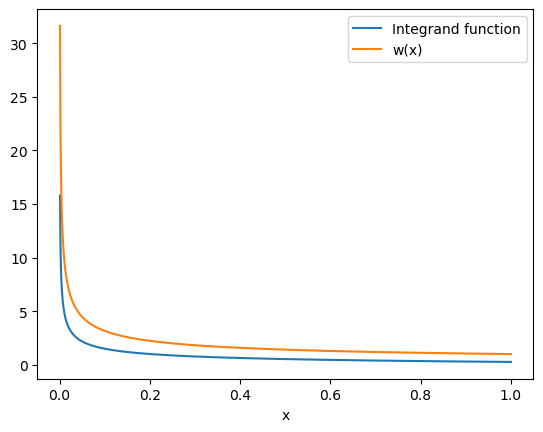

In [134]:
# Ex. 4.

#define the function to integrate
def f(x):
    return x**(-1/2)/(np.exp(x)+1)

#define the weight function
def w(x):
    return 1/np.sqrt(x)

#inverse transform method for sampling
def inv_transform(y):
    return y**2/4

#plot of the function to integrate
xs = np.linspace(0.001, 1, 1000)
fig = plt.figure()
plt.plot(xs, f(xs), label='Integrand function')
plt.plot(xs, w(xs), label='w(x)')
plt.xlabel('x')
plt.legend();

#inverse transform method for sampling
N = 10**6
y = np.random.uniform(0, 2, size=N) #y is uniform distributed variable between 0 and 2
x = inv_transform(y)

#integration with importance sampling
I = 1/N * np.sum(f(x)/w(x)) * 2.   #2 = value of integral w(z) in (0,1)

print('The integral value with importance sampling is: {:.4f}'.format(I))
print('The expect integral value is around: 0.84')